# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [1]:
student_number = 99109788
full_name = 'Mobina Salimipanah'
assert student_number and full_name is not None, 'pls input your information'

# Introduction

In this assignment, you will implement PCA and try to interpret it.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [3]:
#TODO
data = pd.read_csv('nutrition.csv')
data

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


Display dataset information.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [5]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data = numeric_data.drop('ID', axis=1)
non_numeric_data = data.select_dtypes(exclude=[np.number])
print(numeric_data.head())

   Energy_kcal  Protein_g  Fat_g  Carb_g  Sugar_g  Fiber_g  VitA_mcg  \
0        717.0       0.85  81.11    0.06     0.06      0.0     684.0   
1        717.0       0.85  81.11    0.06     0.06      0.0     684.0   
2        876.0       0.28  99.48    0.00     0.00      0.0     840.0   
3        353.0      21.40  28.74    2.34     0.50      0.0     198.0   
4        371.0      23.24  29.68    2.79     0.51      0.0     292.0   

   VitB6_mg  VitB12_mcg  VitC_mg  ...  Folate_USRDA  Niacin_USRDA  \
0     0.003        0.17      0.0  ...        0.0075      0.002625   
1     0.003        0.13      0.0  ...        0.0075      0.002625   
2     0.001        0.01      0.0  ...        0.0000      0.000188   
3     0.166        1.22      0.0  ...        0.0900      0.063500   
4     0.065        1.26      0.0  ...        0.0500      0.007375   

   Riboflavin_USRDA  Thiamin_USRDA  Calcium_USRDA  Copper_USRDA  \
0          0.026154       0.004167       0.020000      0.000000   
1          0.02615

First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

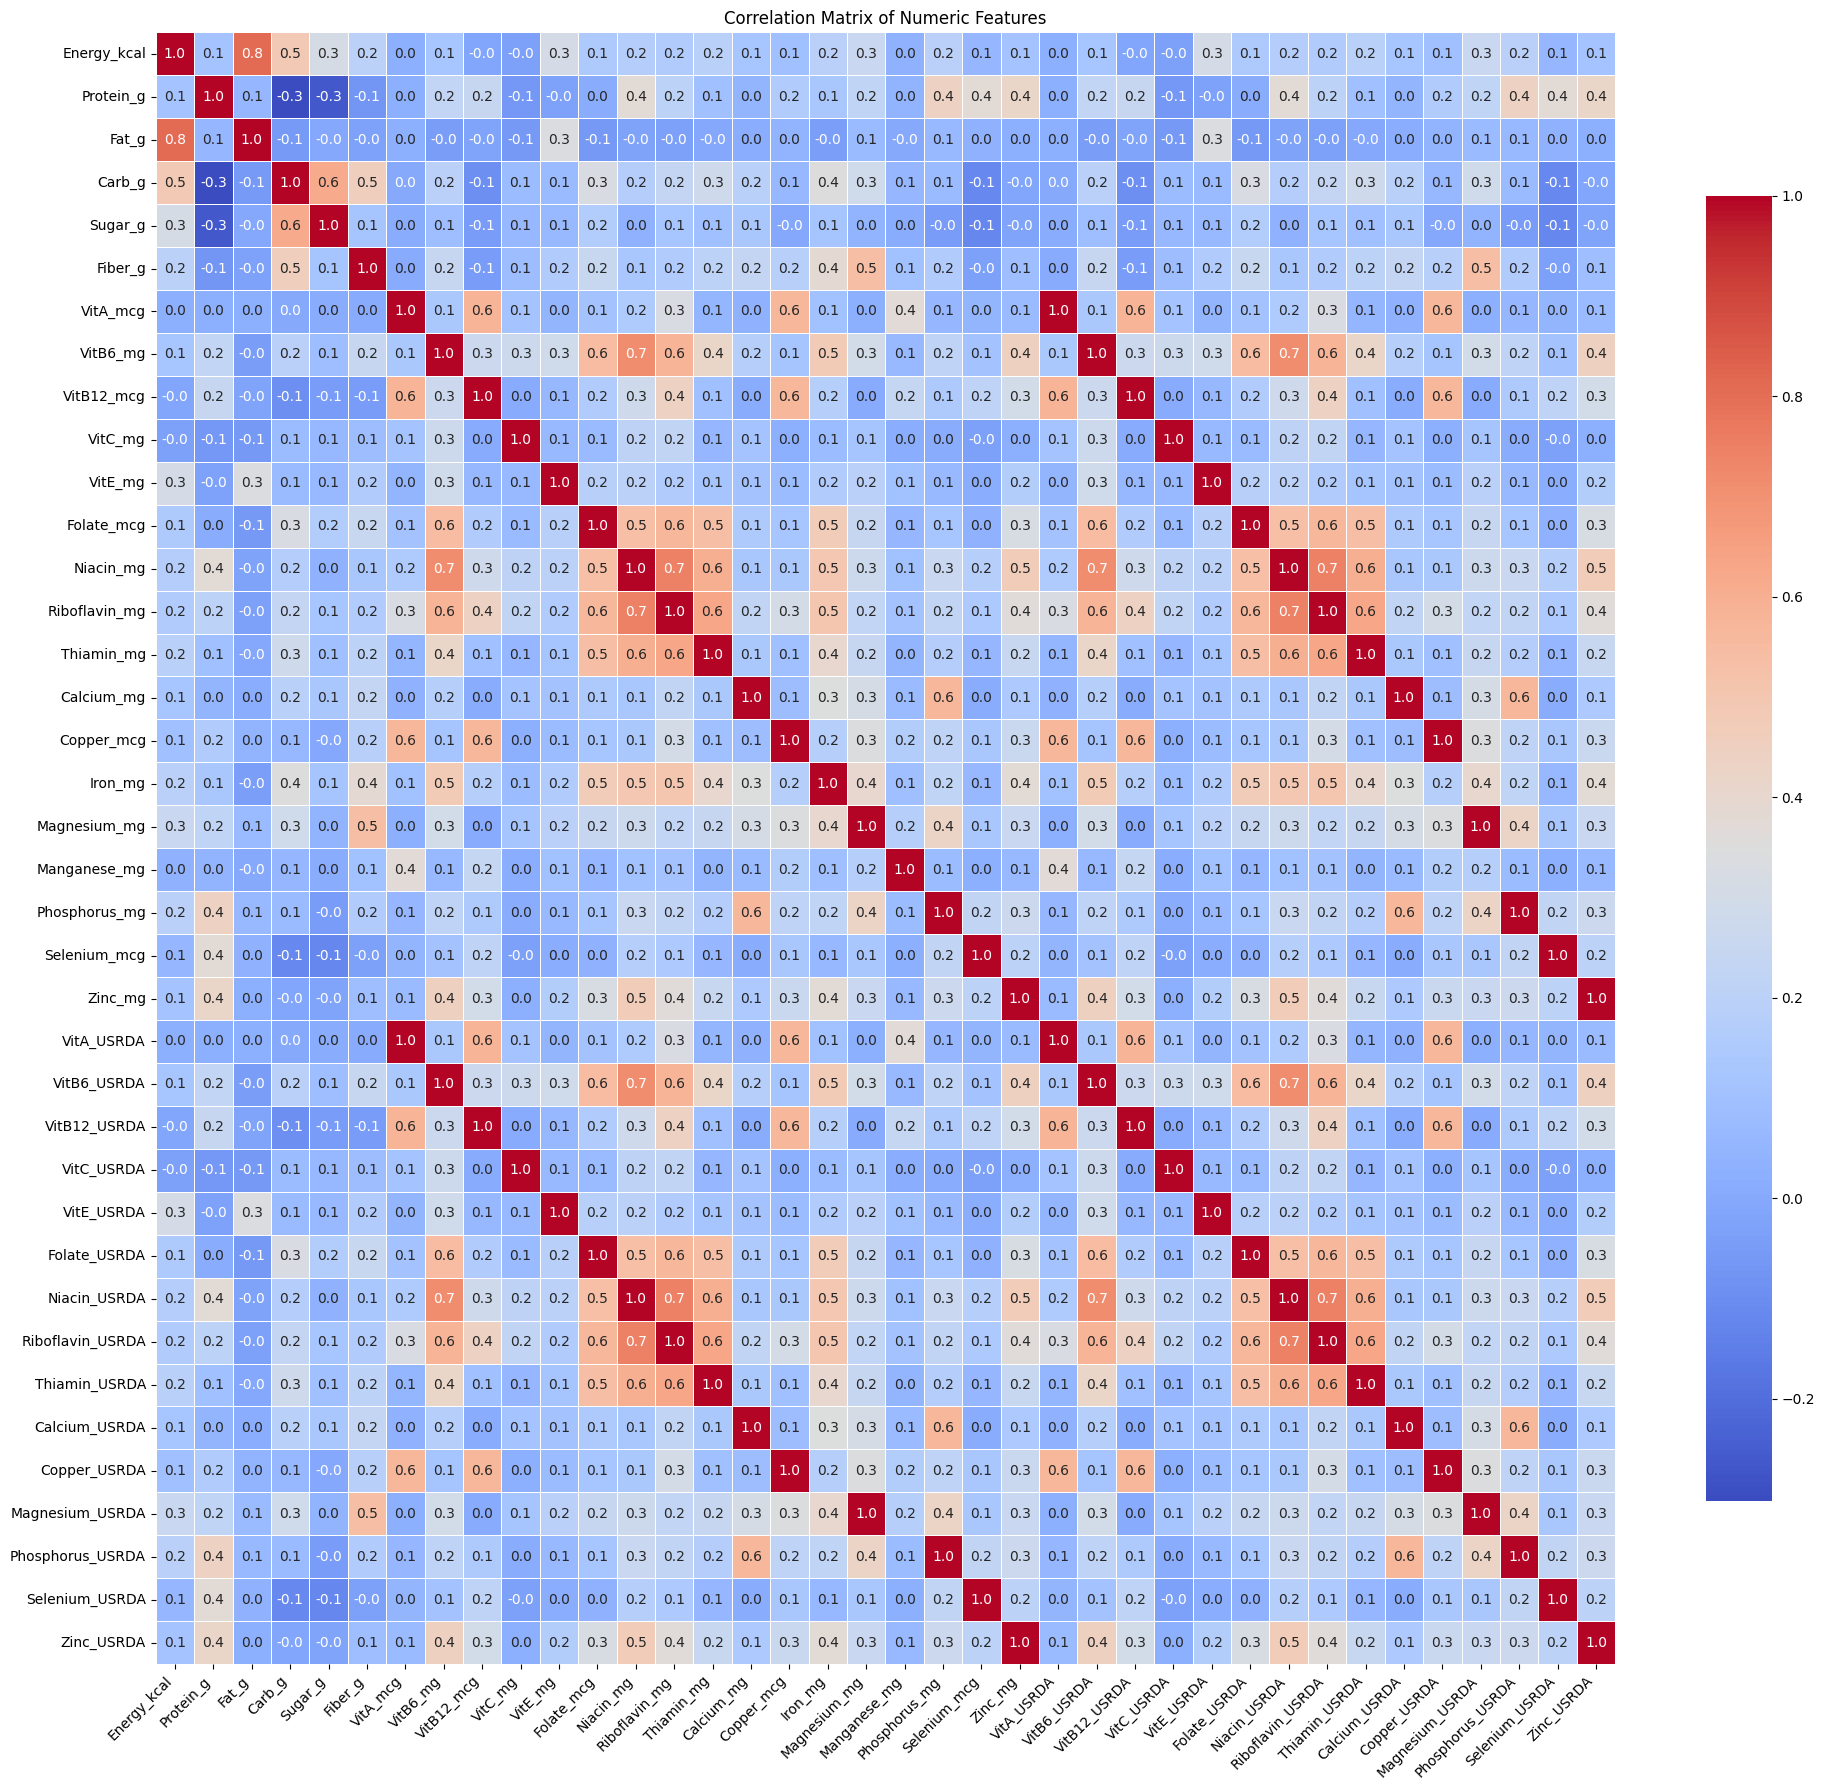

In [6]:
# Plotting the correlation matrix
plt.figure(figsize=(20, 18))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

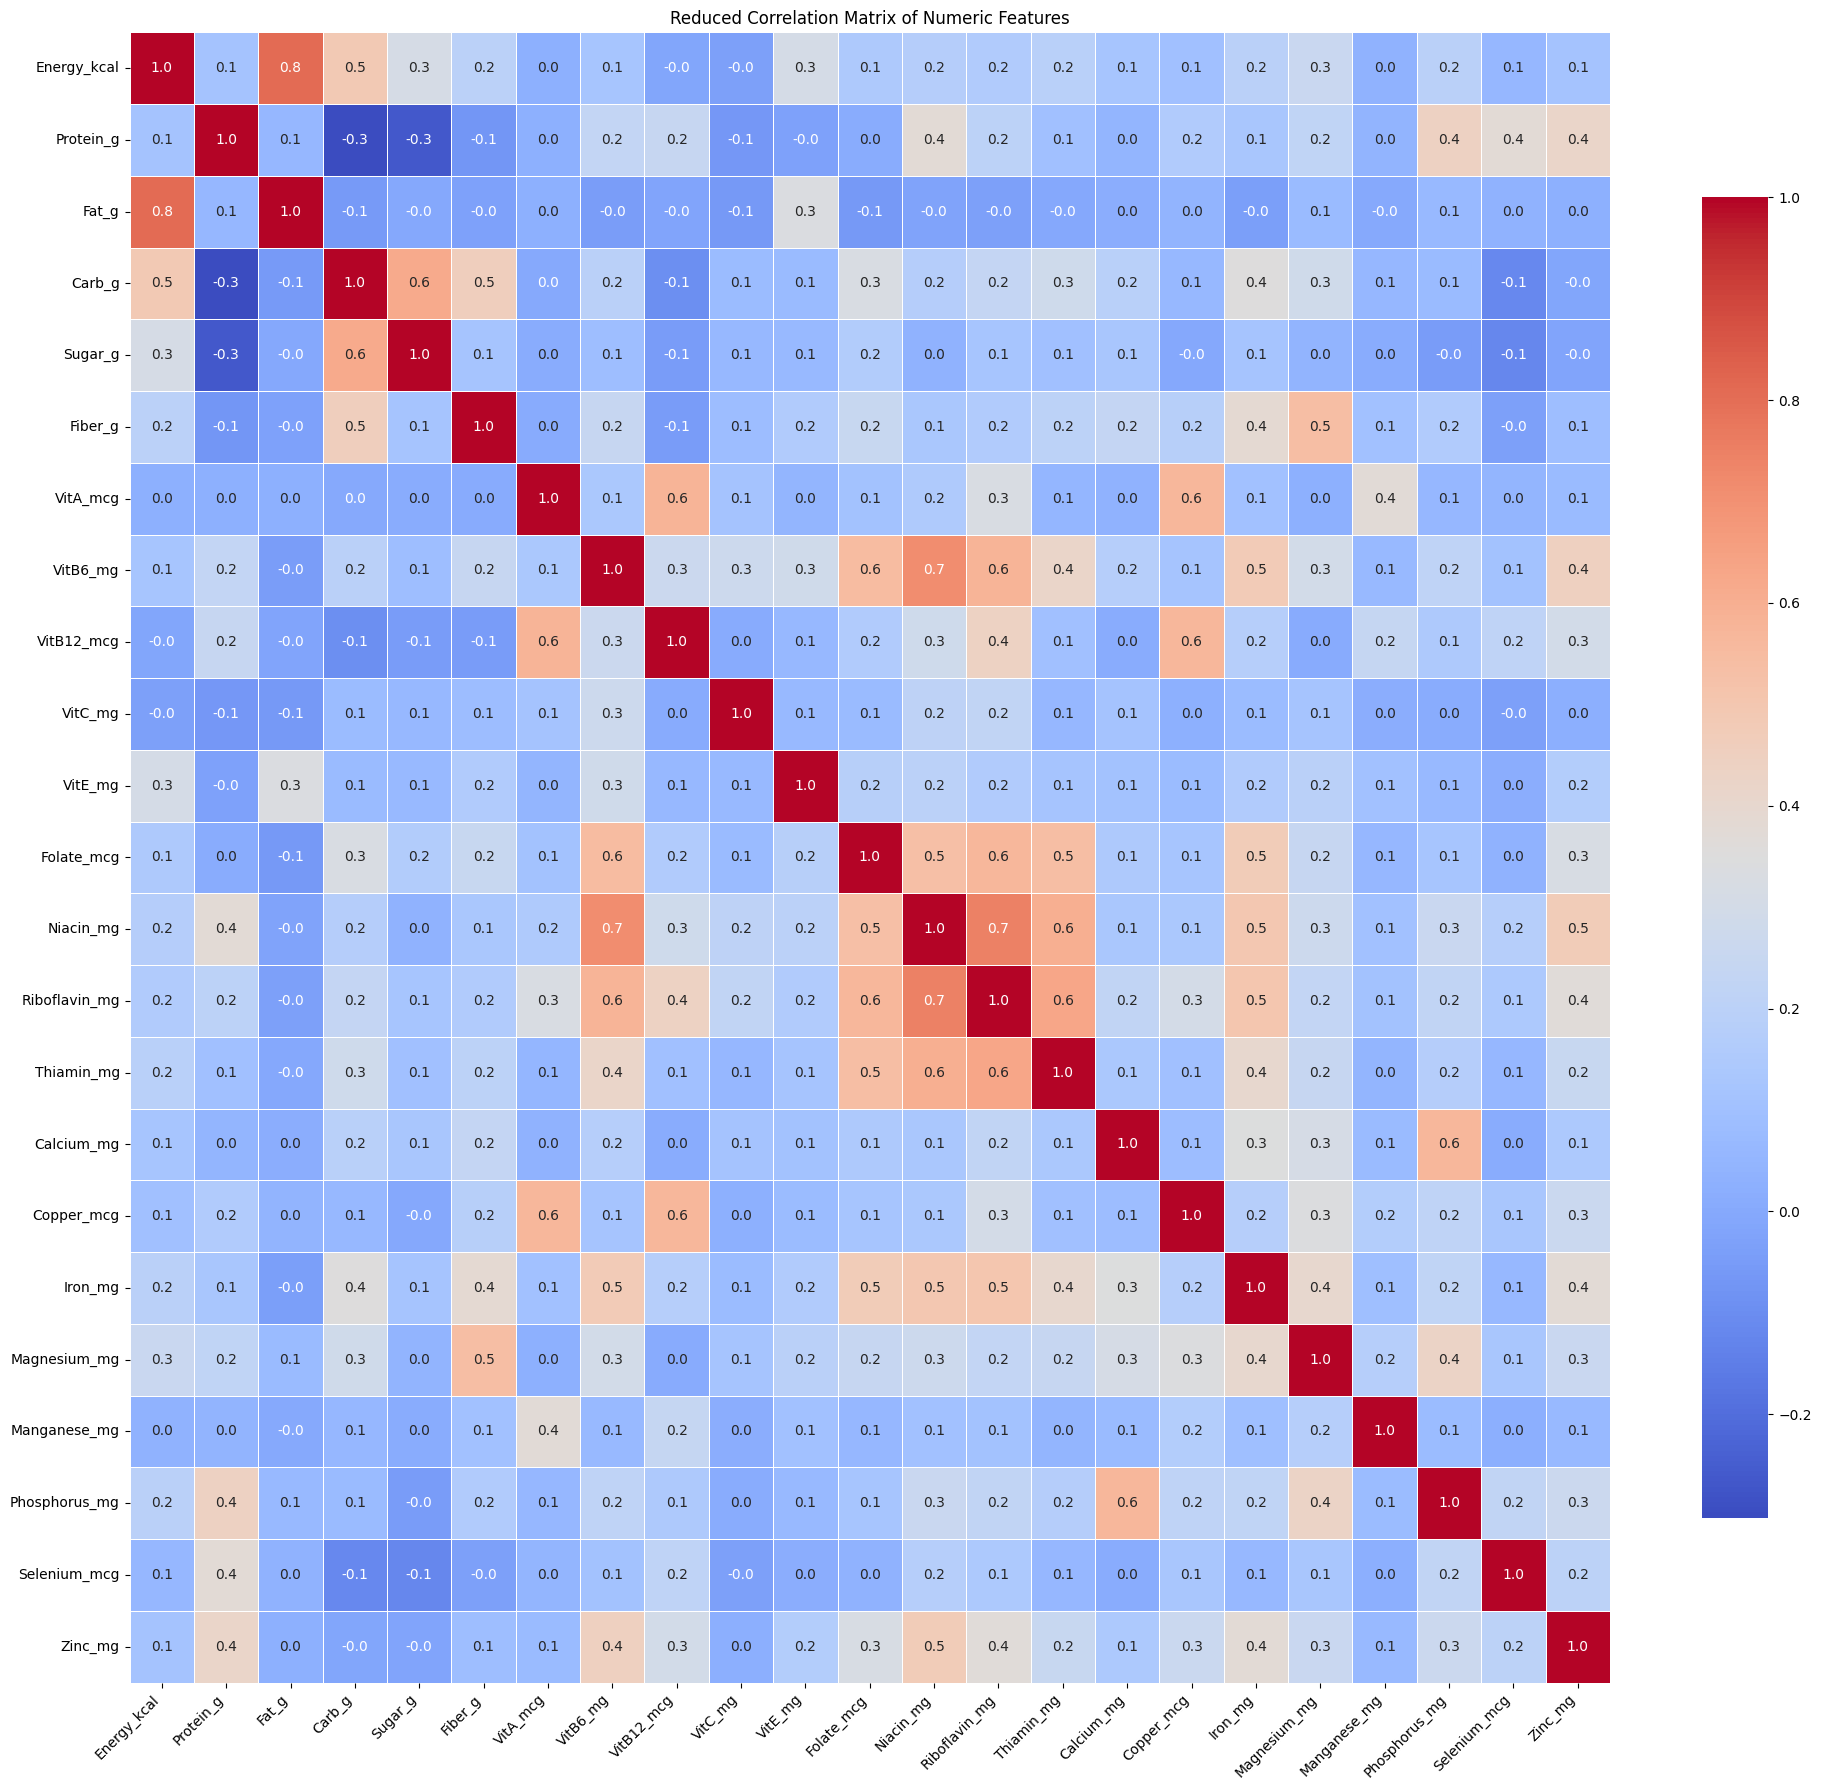

In [7]:
#TODO
correlation_matrix = numeric_data.corr()

to_drop = set()
high_corr_threshold = 0.9

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= high_corr_threshold:
            to_drop.add(correlation_matrix.columns[j])

# Drop highly correlated columns
numeric_data_reduced = numeric_data.drop(columns=to_drop)

plt.figure(figsize=(20, 18))
sns.heatmap(numeric_data_reduced.corr(), annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Reduced Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

Explore the dataset by plotting the distribution of each feature separately.

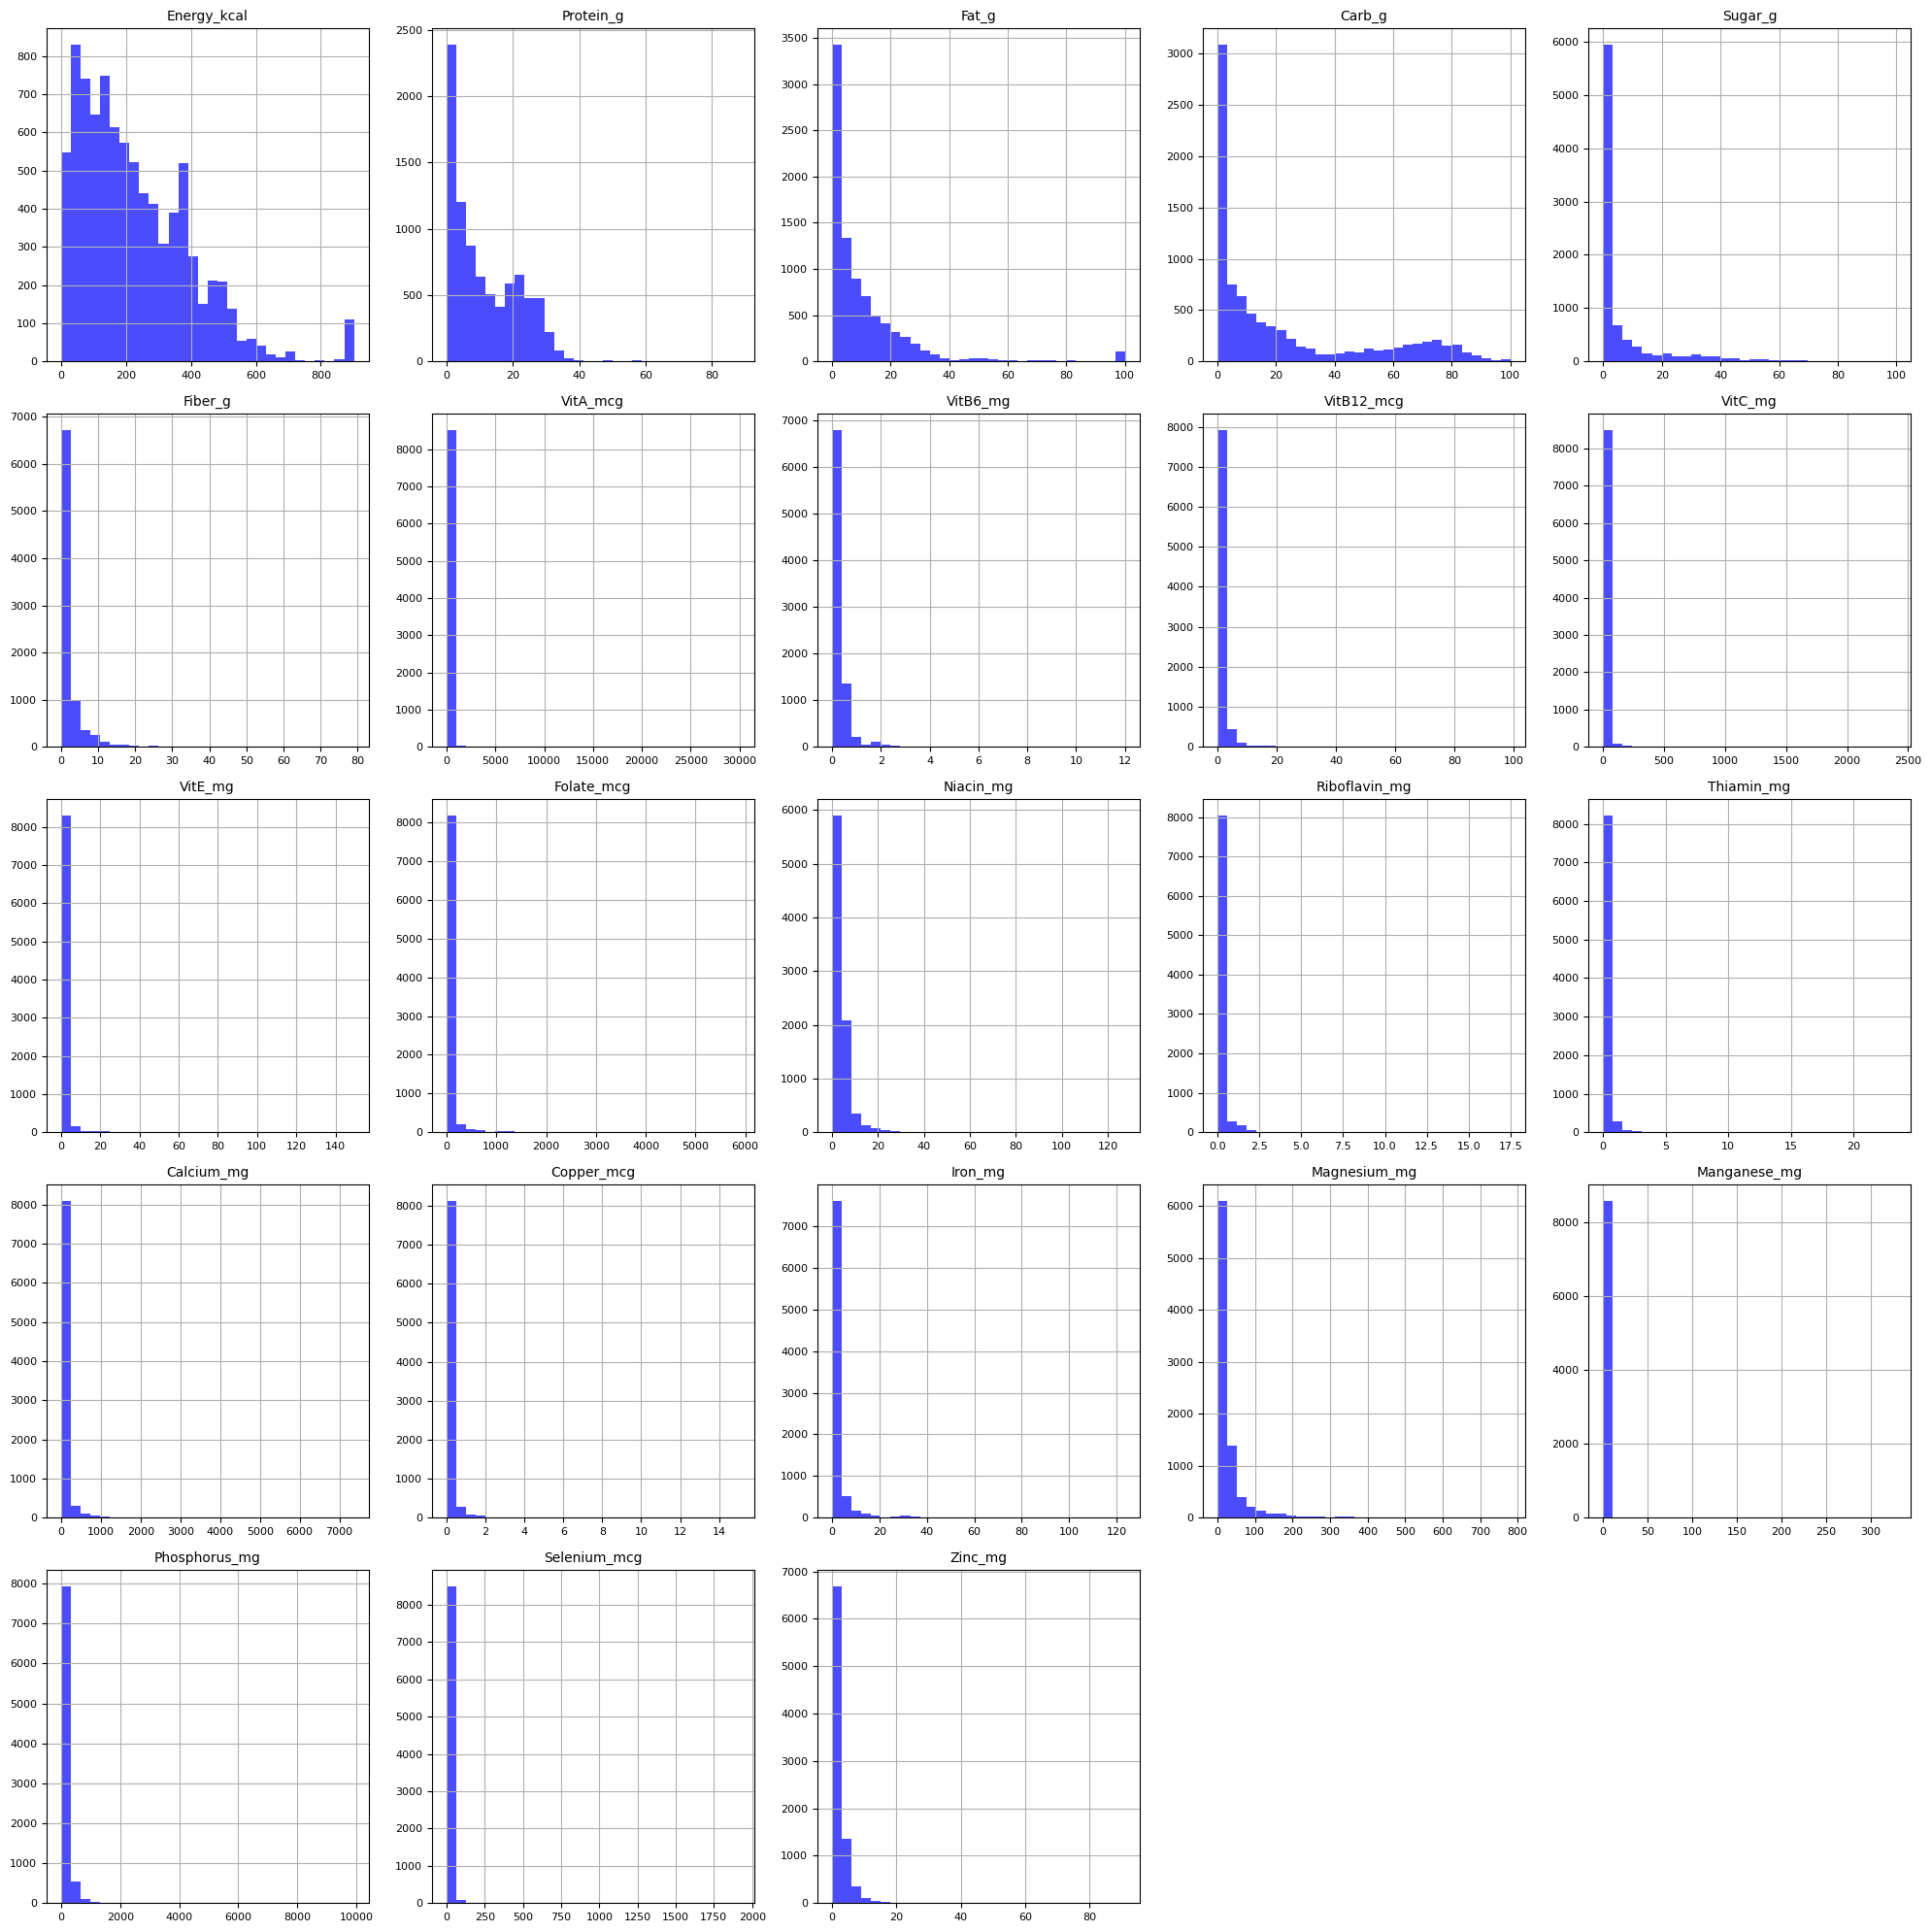

In [8]:
num_features = len(numeric_data_reduced.columns)
num_rows = (num_features // 5) + (1 if num_features % 5 > 0 else 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_data_reduced.columns):
    ax = axes[i]
    numeric_data_reduced[col].hist(ax=ax, bins=30, color='blue', alpha=0.7)
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=6)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [9]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
df = numeric_data_reduced + 1
df_boxcoxed = pd.DataFrame(index=df.index)

for i in df.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(df.loc[:, i])[0]


Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

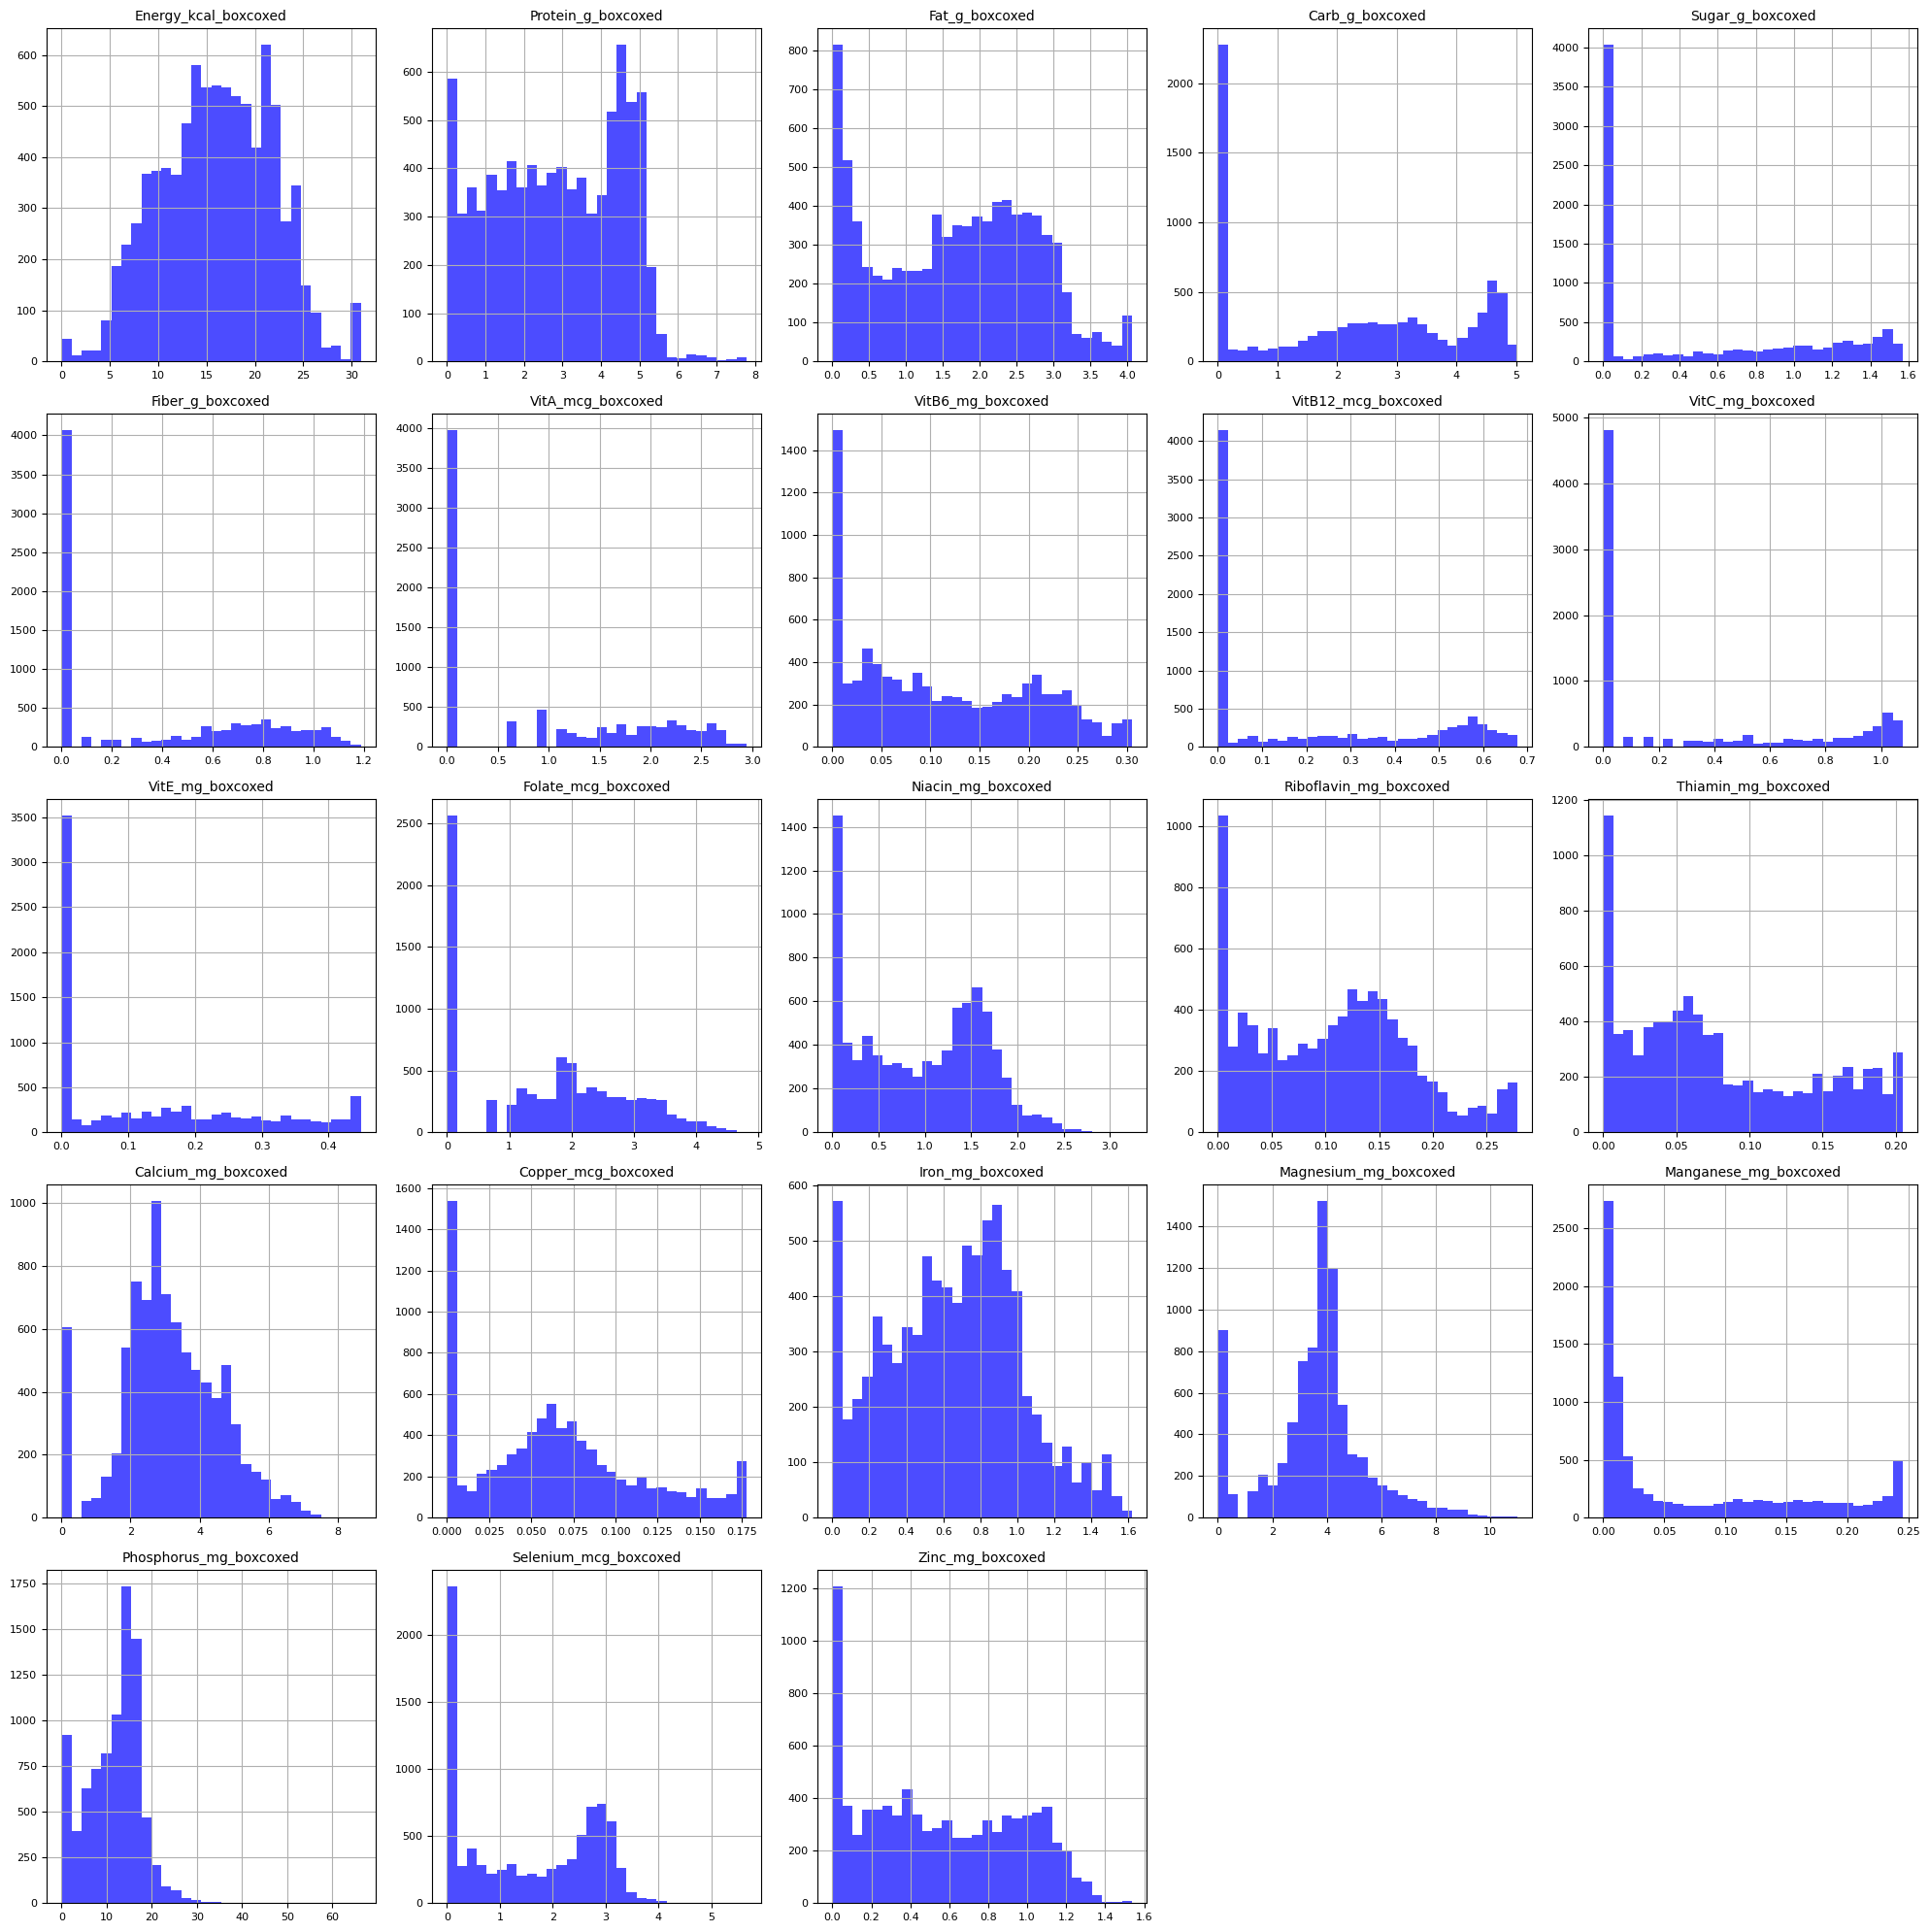

In [10]:
num_features = len(df_boxcoxed.columns)
num_rows = (num_features // 5) + (1 if num_features % 5 > 0 else 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(df_boxcoxed.columns):
    ax = axes[i]
    df_boxcoxed[col].hist(ax=ax, bins=30, color='blue', alpha=0.7)
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=6)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [11]:
#TODO
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_boxcoxed)
scaled_data_df = pd.DataFrame(scaled_data, columns=df_boxcoxed.columns, index=df_boxcoxed.index)


overall_mean = scaled_data_df.values.mean()
overall_variance = scaled_data_df.values.var()

if np.abs(overall_mean) < 1e-10:
    overall_mean = 0

print(f"Overall mean of standardized data: {overall_mean}")
print(f"Overall variance of standardized data: {overall_variance}")

Overall mean of standardized data: 0
Overall variance of standardized data: 0.9999999999999999


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [12]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        covariance_matrix = np.cov(X_centered, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        self.components = eigenvectors[:, :self.n_components]
        self.explained_variance_ = eigenvalues[:self.n_components]
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = self.explained_variance_ / total_variance

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio_

    def get_components(self):
        return self.components


Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [13]:
#TODO
pca = CustomPCA(n_components=scaled_data.shape[1])
pca.fit(scaled_data)

X_pca = pca.transform(scaled_data)


In [14]:
print("Number of components used:", pca.n_components)
print("Projected Data:\n", X_pca)
print("Explained Variance Ratio:", pca.get_explained_variance_ratio())
print("PCA Components:\n", pca.get_components())

Number of components used: 23
Projected Data:
 [[ 2.63841405e+00  1.70251243e+00 -1.28372455e+00 ... -1.20971411e-01
   1.93807150e-02 -9.00855602e-01]
 [ 2.53793117e+00  1.55046399e+00 -1.27981556e+00 ... -2.68506471e-01
  -3.62586219e-03 -8.95689901e-01]
 [ 3.75133548e+00  2.08018975e+00 -2.06793169e+00 ...  1.62701837e-01
   3.22116570e-02 -9.97154121e-01]
 ...
 [ 3.28860011e+00 -6.89373554e-01 -1.81022923e+00 ... -5.11991010e-01
   3.50434520e-01 -5.61815379e-01]
 [-1.78153850e+00  7.35900964e-01  1.99994641e+00 ... -1.12915684e+00
   7.90341264e-01  3.83494449e-01]
 [-1.21057433e+00  1.20474083e+00  2.16951014e+00 ... -1.66433999e-01
   6.90435951e-01 -4.67142114e-01]]
Explained Variance Ratio: [0.34554936 0.17971019 0.09201387 0.06176452 0.05520037 0.03764111
 0.02996247 0.02566808 0.02294417 0.0192006  0.01828886 0.01721459
 0.01443828 0.01337614 0.0107629  0.00977106 0.00894584 0.00878398
 0.00760274 0.00668982 0.00589323 0.00545379 0.00312402]
PCA Components:
 [[-1.65126285e-0

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


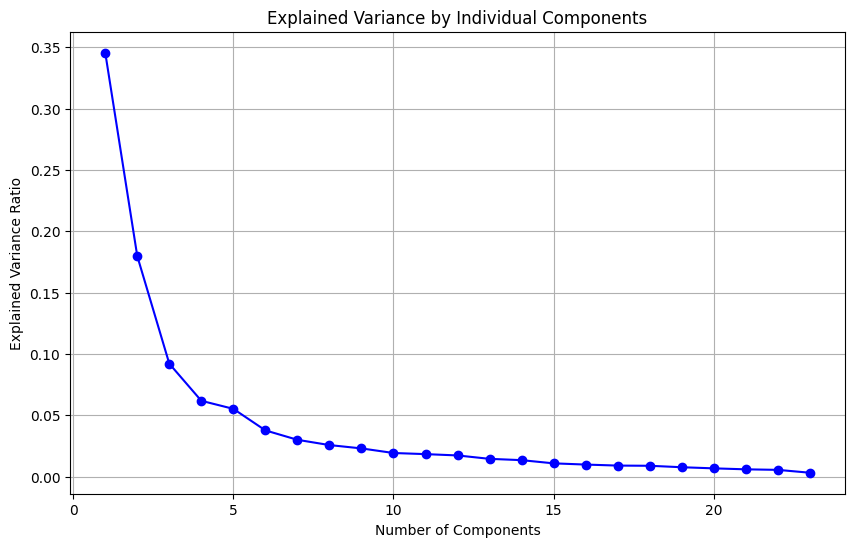

In [15]:
explained_variance_ratio = pca.get_explained_variance_ratio()


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Individual Components')
plt.grid(True)
plt.show()



therefore we are going to pick 5 components

In [16]:
# Print the total explained variance ratio for the first 5 components
explained_variance_ratio = pca.get_explained_variance_ratio()
total_explained_variance_ratio_first_5 = sum(explained_variance_ratio[:5])
print("Total explained variance ratio for the first 5 components:", total_explained_variance_ratio_first_5)


Total explained variance ratio for the first 5 components: 0.7342383069200722


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [17]:
pca = CustomPCA(n_components=5)
pca.fit(scaled_data)

X_pca = pca.transform(scaled_data)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df.index)

pca_df['FoodGroup'] = data['FoodGroup']
pca_df['ShortDescrip'] = data['ShortDescrip']
pca_df['Descrip'] = data['Descrip']

print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5               FoodGroup  \
0  2.638414  1.702512 -1.283725 -3.759546 -2.413650  Dairy and Egg Products   
1  2.537931  1.550464 -1.279816 -3.634065 -2.492683  Dairy and Egg Products   
2  3.751335  2.080190 -2.067932 -3.668154 -2.457203  Dairy and Egg Products   
3 -2.000578  1.361858  0.395834 -2.432792 -0.887796  Dairy and Egg Products   
4 -1.582713  1.321484  0.238444 -2.597599 -1.286317  Dairy and Egg Products   

               ShortDescrip                     Descrip  
0          BUTTER,WITH SALT              Butter, salted  
1  BUTTER,WHIPPED,WITH SALT  Butter, whipped, with salt  
2      BUTTER OIL,ANHYDROUS       Butter oil, anhydrous  
3               CHEESE,BLUE                Cheese, blue  
4              CHEESE,BRICK               Cheese, brick  


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

In [18]:
# Assuming pca_df is the DataFrame containing your PCA components
correlation_matrix = pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']].corr()

rounded_correlation_matrix = correlation_matrix.round(2)
print(rounded_correlation_matrix)

     PC1  PC2  PC3  PC4  PC5
PC1  1.0  0.0 -0.0 -0.0  0.0
PC2  0.0  1.0 -0.0  0.0 -0.0
PC3 -0.0 -0.0  1.0  0.0  0.0
PC4 -0.0  0.0  0.0  1.0  0.0
PC5  0.0 -0.0  0.0  0.0  1.0


# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

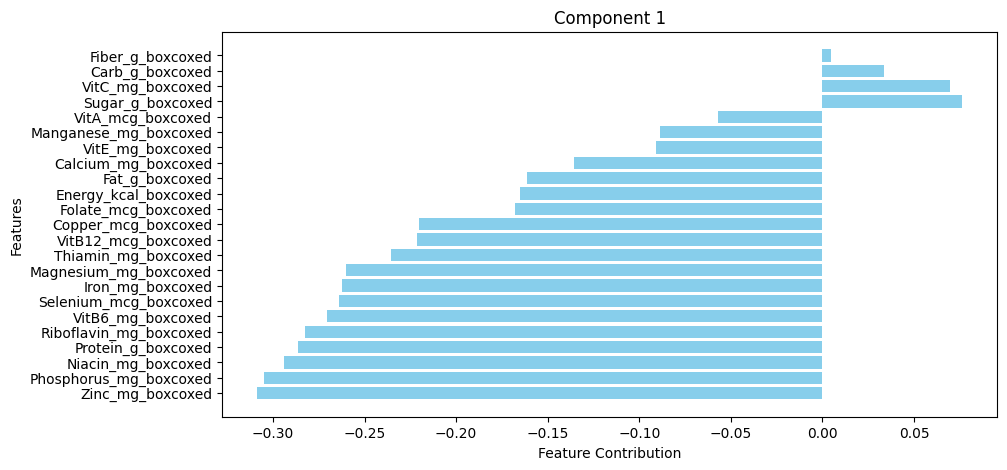

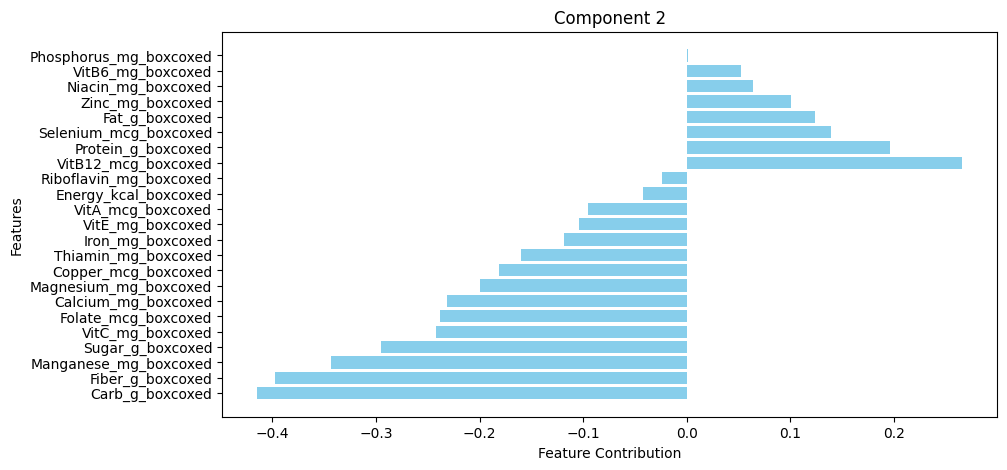

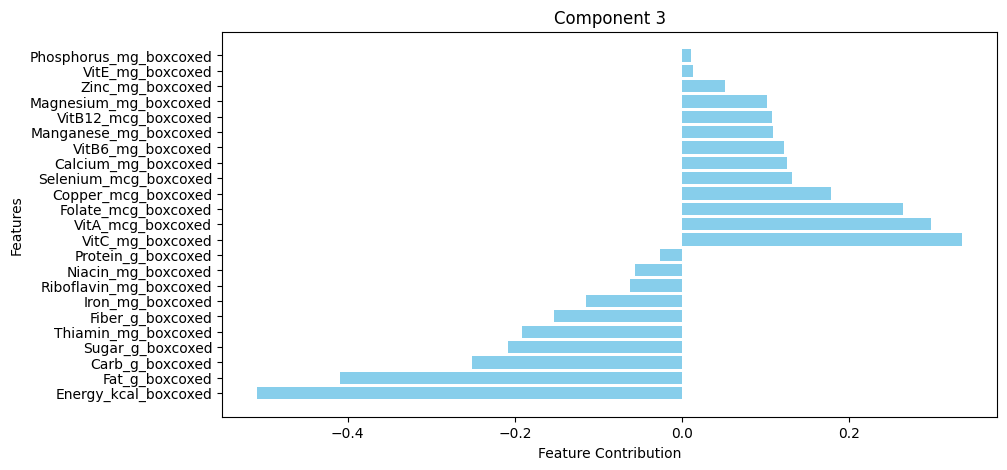

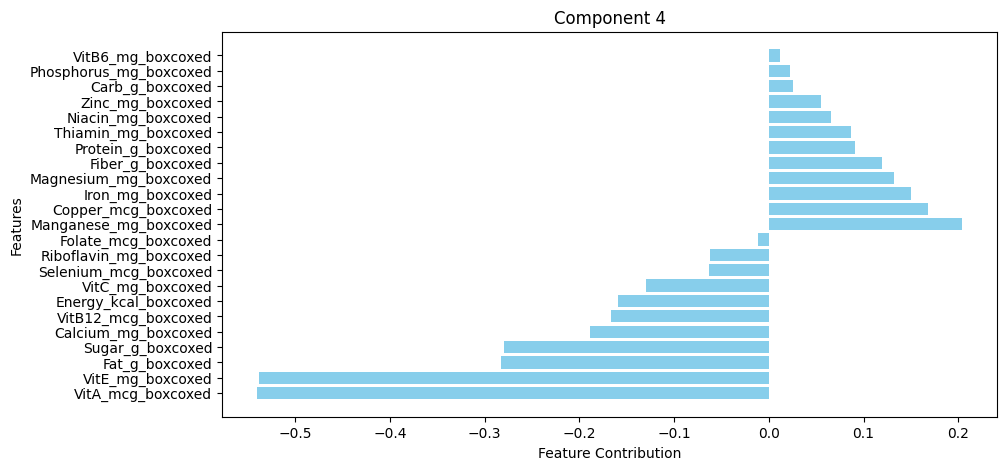

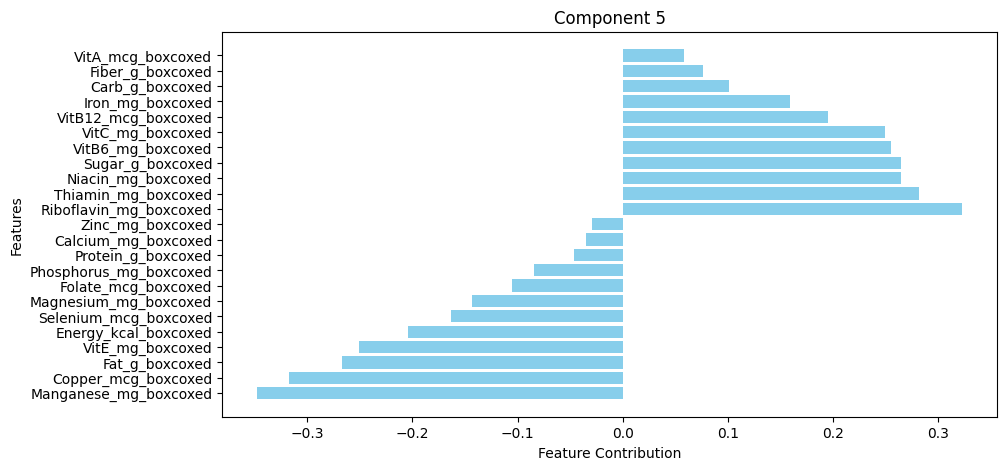

In [19]:

eigenvectors = pca.get_components()
feature_names = scaled_data_df.columns

num_components = eigenvectors.shape[1]

for i in range(min(5, num_components)):
    plt.figure(figsize=(10, 5))
    component = eigenvectors[:, i]

    positive_indices = np.where(component >= 0)[0]
    negative_indices = np.where(component < 0)[0]

    sorted_pos_indices = positive_indices[np.argsort(-component[positive_indices])]
    sorted_neg_indices = negative_indices[np.argsort(component[negative_indices])]

    sorted_indices = np.concatenate([sorted_neg_indices, sorted_pos_indices])

    sorted_features = np.array(feature_names)[sorted_indices]
    sorted_contributions = component[sorted_indices]

    plt.barh(sorted_features, sorted_contributions, color='skyblue')
    plt.title(f"Component {i+1}")
    plt.xlabel('Feature Contribution')
    plt.ylabel('Features')
    plt.show()


### What do these plots tell us about the first and second components?
The PCA component plots reveal key dietary patterns:

### Component 1:
- **Highlights**: Dominated by nutrients like Zinc, Phosphorus, and Protein.
- **Interpretation**: Likely distinguishes high-protein and mineral-rich foods from those high in carbohydrates and fiber, possibly reflecting a split between animal-based and plant-based foods.

### Component 2:
- **Highlights**: Influenced by Vitamin C, Magnesium, and Folate, with negative influences from Phosphorus and Zinc.
- **Interpretation**: Seems to capture variation related to micronutrient density, differentiating nutrient-rich, health-promoting foods from others less dense in these nutrients.

**Utility**:
- These insights can guide nutritional planning, product development in the food industry, and educational initiatives about dietary choices based on nutrient content.



### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

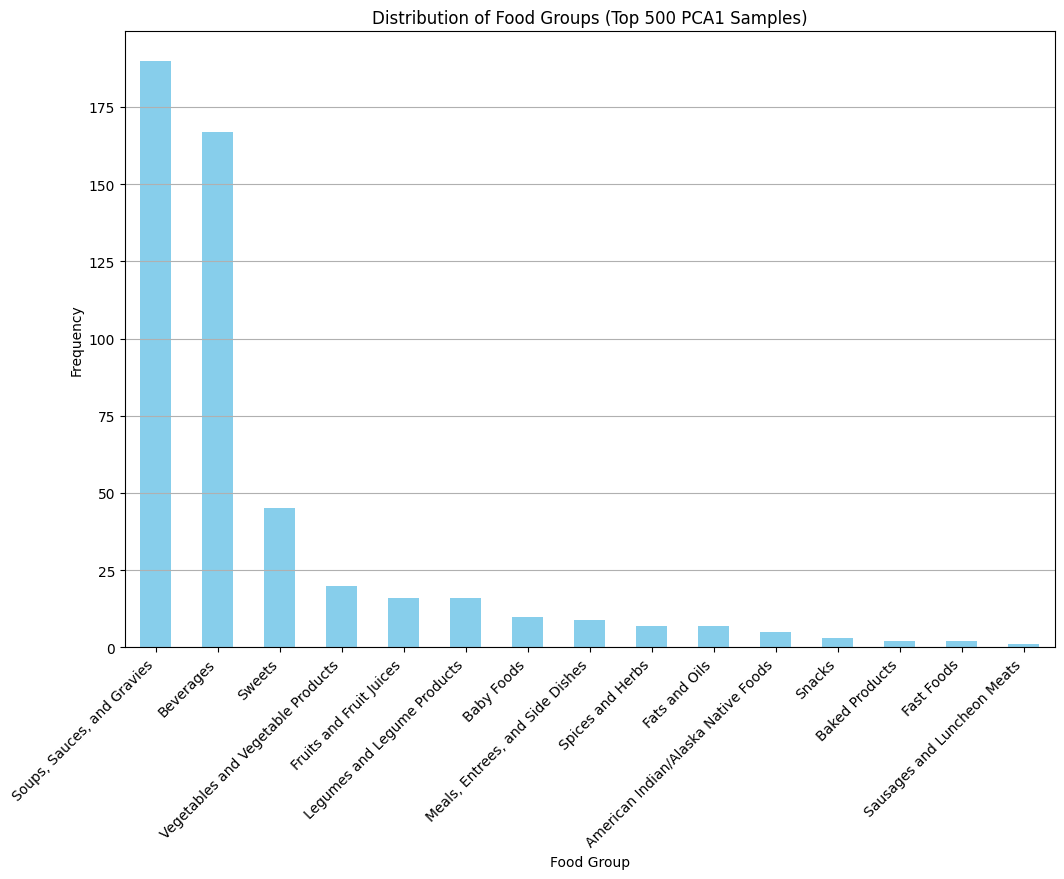

In [20]:
#TODO
top_500_pca1 = pca_df.nlargest(500, 'PC1')
# Plot the distribution of food groups for the top 500 samples
plt.figure(figsize=(12, 8))
top_500_pca1['FoodGroup'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Food Groups (Top 500 PCA1 Samples)')
plt.xlabel('Food Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


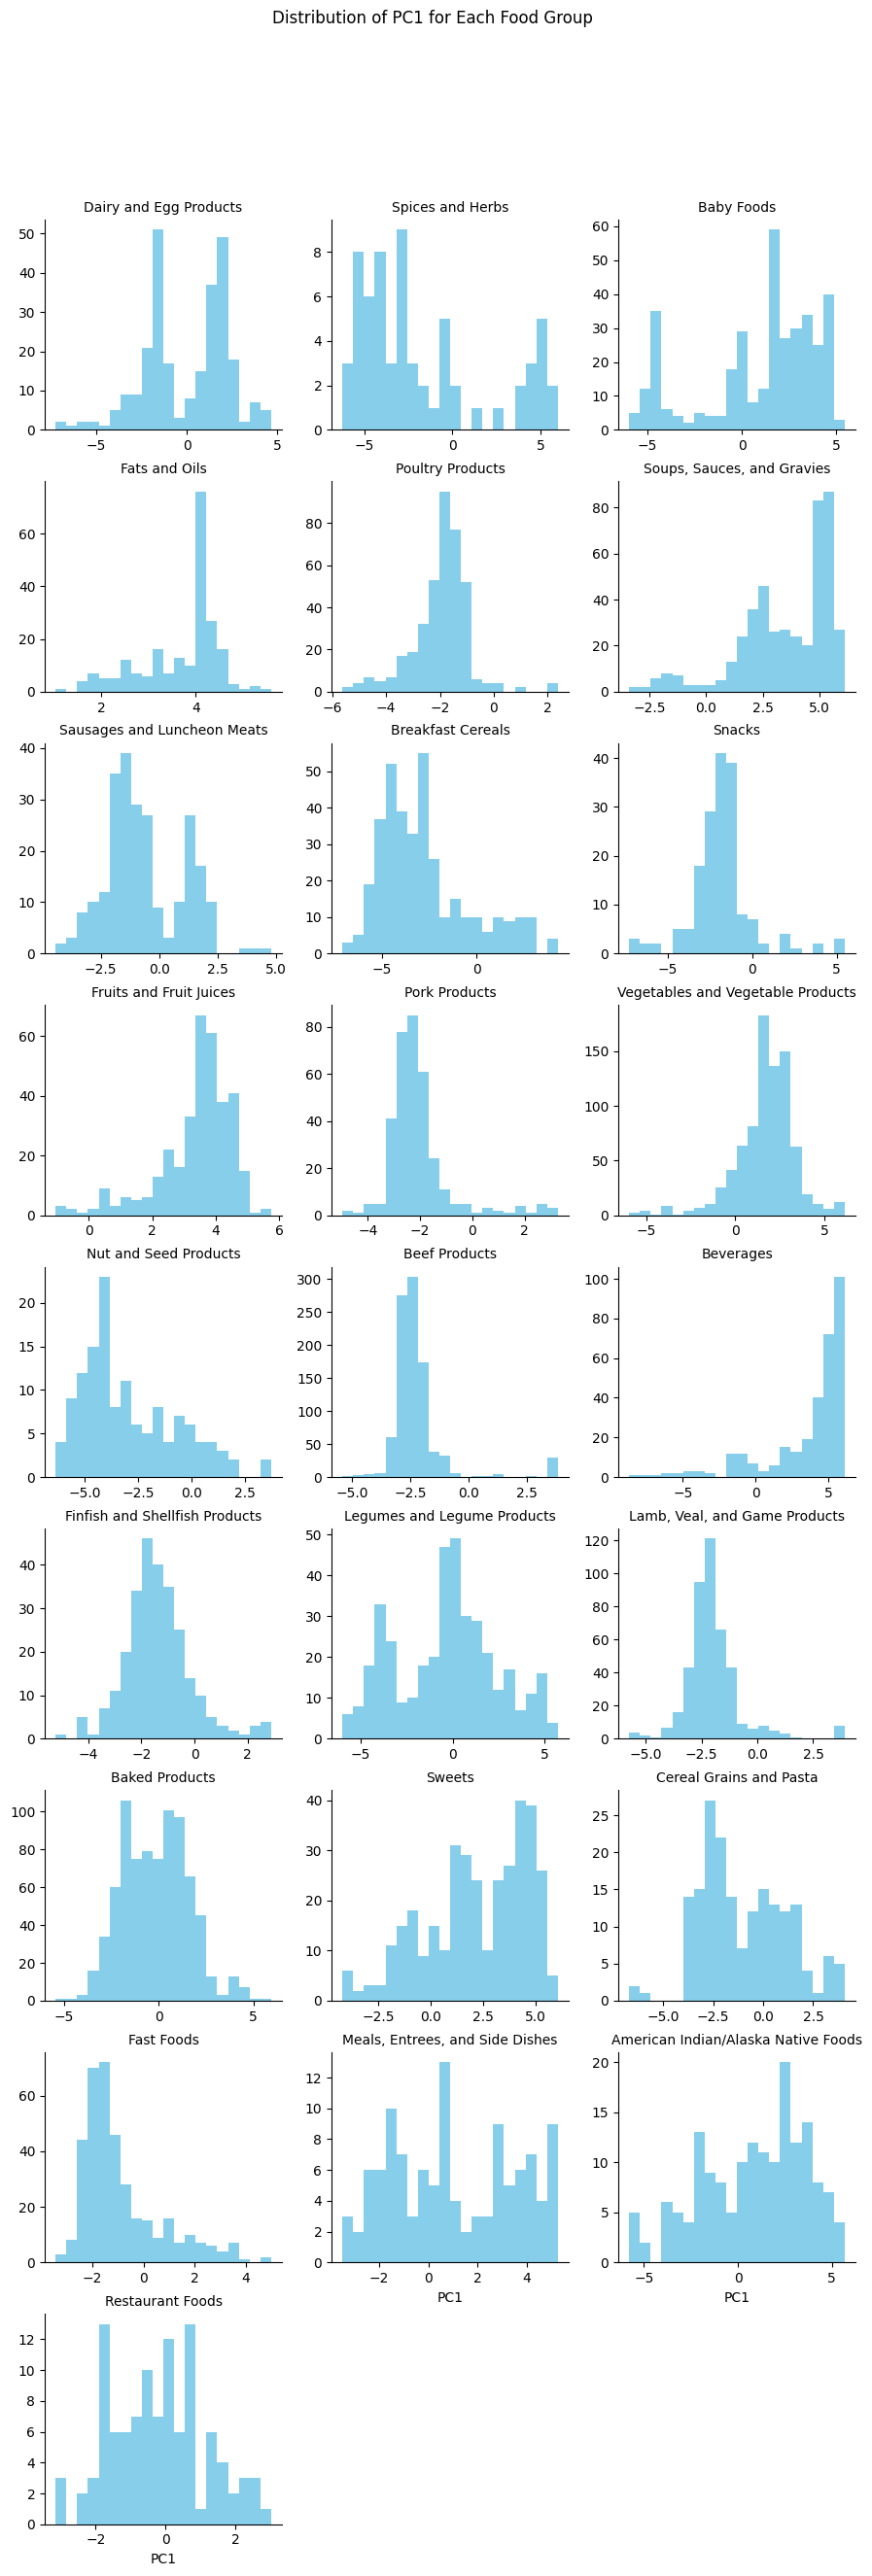

In [21]:
g = sns.FacetGrid(pca_df, col="FoodGroup", col_wrap=3, height=3, sharex=False, sharey=False)
g.map(plt.hist, 'PC1', bins=20, color='skyblue')
g.set_titles("{col_name}")
g.set_axis_labels("PC1", "")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of PC1 for Each Food Group')
plt.show()


Do the same for pca2.

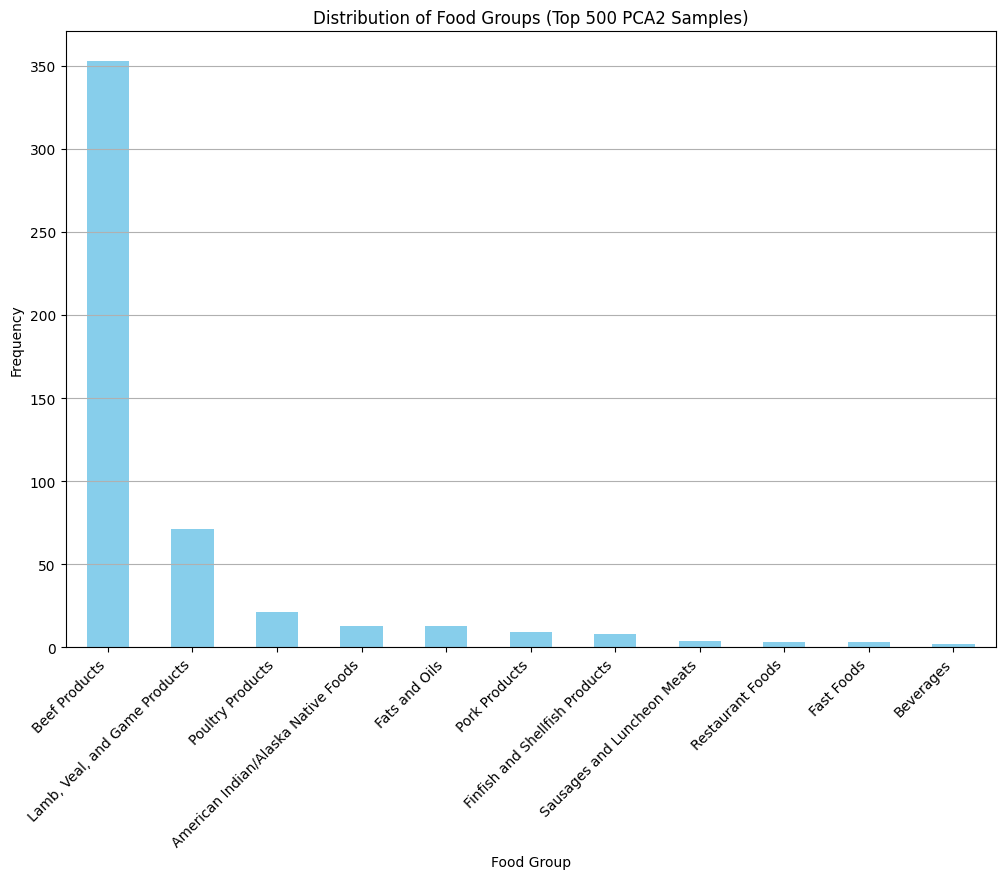

In [22]:
top_500_pca2 = pca_df.nlargest(500, 'PC2')

plt.figure(figsize=(12, 8))
top_500_pca2['FoodGroup'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Food Groups (Top 500 PCA2 Samples)')
plt.xlabel('Food Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

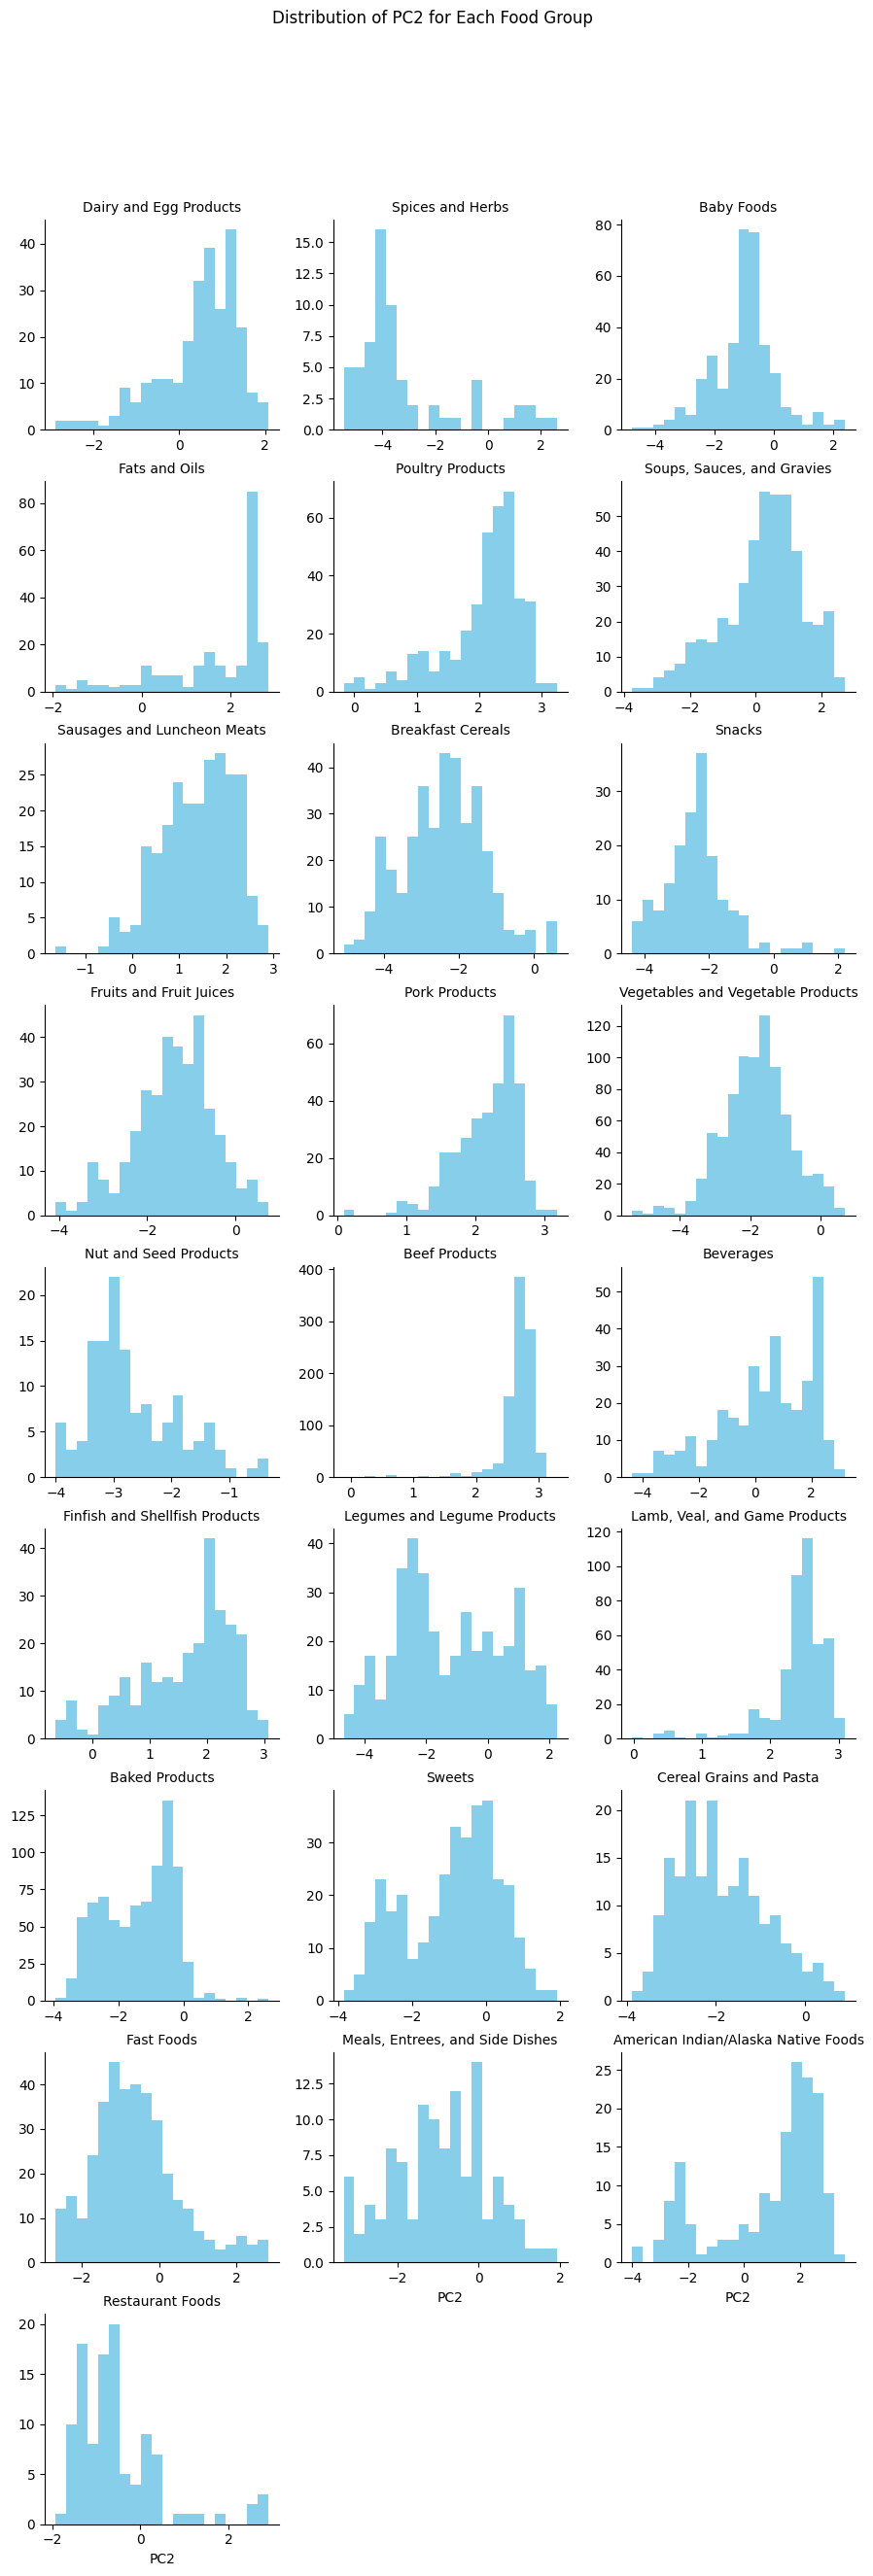

In [24]:
g2 = sns.FacetGrid(pca_df, col="FoodGroup", col_wrap=3, height=3, sharex=False, sharey=False)
g2.map(plt.hist, 'PC2', bins=20, color='skyblue')
g2.set_titles("{col_name}")
g2.set_axis_labels("PC2", "")
plt.subplots_adjust(top=0.9)
g2.fig.suptitle('Distribution of PC2 for Each Food Group')
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


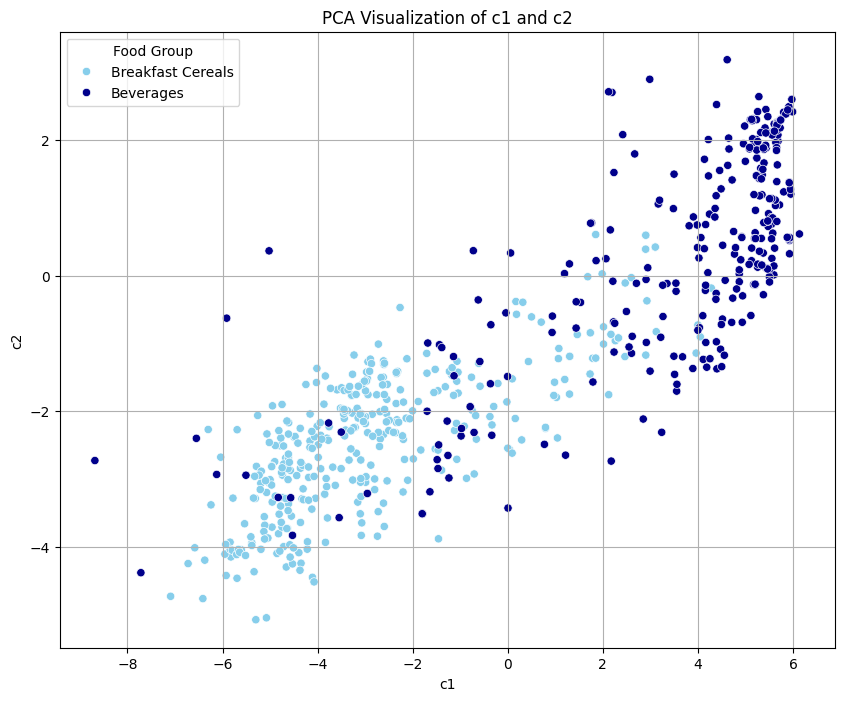

In [25]:
filtered_df = pca_df[pca_df['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])]

# Plot PCA1 vs PCA2 for Beverages and Breakfast Cereals
plt.figure(figsize=(10, 8))
sns.scatterplot(data=filtered_df, x='PC1', y='PC2', hue='FoodGroup', palette=['skyblue', 'darkblue'])
plt.title('PCA Visualization of c1 and c2')
plt.xlabel('c1')
plt.ylabel('c2')
plt.legend(title='Food Group')
plt.grid(True)
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)
The distribution plots for the top PCA1 and PCA2 samples across different food groups provide a detailed visualization of how these principal components correlate with specific categories of food. Here are the key insights from these distributions:

1. **Dominant Food Groups in PCA Scores**:
   - **PCA1**: The histograms show that certain food groups like "Dairy and Egg Products" and "Spices and Herbs" have a significant presence in the higher PCA1 values, suggesting that these groups have unique nutrient profiles that set them apart in the dataset.
   - **PCA2**: Similarly, "Dairy and Egg Products" also dominate in PCA2, but with notable presence from "Fats and Oils" and "Beverages," indicating different nutritional aspects being captured by this component.

2. **Variability Within Food Groups**:
   - Each food group shows varied distributions in PCA scores, reflecting the internal diversity in nutritional content. For instance, "Vegetables and Vegetable Products" show a broad spread in PCA1, indicating diverse nutrient contributions within this group.
   - "Spices and Herbs" display a broader spread in PCA2, suggesting varied impacts on this component, potentially reflecting different usage patterns or nutrient densities.

3. **Insight into Nutritional Patterns**:
   - PCA1 and PCA2 help differentiate food groups based on underlying nutritional values, such as high-fat, high-protein, or rich in specific vitamins and minerals.
   - The presence of food groups in specific quadrants of PCA scores can inform about common nutritional themes, such as high-calorie foods clustering together or low-calorie but nutrient-dense foods appearing distinctly.

4. **Applications**:
   - **Nutritional Research**: These insights can be pivotal for nutritional epidemiology studies, helping to identify dietary patterns associated with health outcomes.
   - **Food Industry Targeting**: Understanding which food groups cluster together on PCA scores can help in product positioning, dietary recommendations, and marketing strategies focused on health and nutrition.
   - **Dietary Recommendations**: Dietitians and nutritionists can use these insights to recommend balanced diets based on the PCA profiles of food groups, promoting foods that balance between PCA1 and PCA2 characteristics for well-rounded nutrition.

In summary, the plots offer a granular view of how different food groups contribute to overall dietary patterns, as represented by the first two principal components, and provide a basis for targeted nutritional strategies and research.


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

The last plot visualizing PCA1 and PCA2 for "Breakfast Cereals" and "Beverages" and the distribution plots for PCA1 across different food groups highlight key relationships:

1. **Clustering and Variability**: "Breakfast Cereals" and "Beverages" show distinct clustering patterns in the PCA plot, indicating unique nutritional profiles that differentiate them from other food groups. This is consistent with the PCA1 distribution plots where we see specific patterns and ranges for each food group.

2. **Position on PCA Axes**: In the PCA plot, "Breakfast Cereals" and "Beverages" occupy different regions, which can be linked to their respective positions in the PCA1 distribution. For instance, if breakfast cereals generally show higher PCA1 values, this aligns with their clustering towards the right on the PCA plot, suggesting higher values on principal component axes often represent higher content of specific nutrients or nutrient combinations that distinguish this group.

3. **Interpretation of PCA Components**: The clustering in PCA visualizations and the spread in PCA1 histograms indicate how PCA1 captures significant variations within each food group, perhaps reflecting underlying nutrient densities or specific nutritional characteristics that PCA1 is sensitive to.

Overall, these visualizations underscore PCA's utility in identifying and visualizing nutritional differences and similarities across various food categories, offering a valuable tool for nutritional analysis and food categorization.

